# Lifestyle and Well-being Analysis
## Semaai Data Analyst Internship Case Study
**by Jessica Syafaq Muthmaina**

Welcome to the Lifestyle and Well-being Analysis project! We're delving into a dataset packed with participant insights, uniquely identified by an ID. This dataset unveils details such as age, income, education level, employment status, technology usage, exercise habits, healthy eating scores, and self-reported life satisfaction. Our mission is to explore the intricate connections between these lifestyle elements and overall well-being. 

## Introduction

### **PREFACE**

In our examination, we opted for the RandomForest classifier as our model. The RandomForest algorithm is an ensemble learning technique that constructs numerous decision trees during training. It then outputs the mode of classes for classification or the mean prediction of individual trees for regression.

The selection of Random Forest for this task is based on several considerations:

Handling Large Data: Random Forest efficiently manages large datasets with high dimensionality, a characteristic vital for our dataset, which includes a substantial number of rows and various features.

1. **Robustness to Overfitting**: Random Forest mitigates the risk of overfitting, a common issue with decision trees. By creating a "forest" of decision trees and making predictions based on majority votes, the algorithm enhances robustness.
2. **Handling Mixed Data Types**: Our dataset comprises both numerical and categorical features. Random Forest adeptly handles this mixture, making it an ideal choice for our analysis.
3. **Feature Importance**: Random Forest offers a straightforward method to estimate feature importance. Given our objective to explore the impact of different factors on diabetes, this feature is particularly beneficial.
4. **Non-linearity**: Medical data often exhibits complex and non-linear relationships. Random Forest, being a non-linear model, effectively captures these relationships.

### **Tools and Libraries**

Equipped with Python, Pandas, Matplotlib, Seaborn, and Scikit-learn, our analytical journey embarks on data exploration, visualization, and machine learning tasks.

### **Dataset**

Immerse yourself in a comprehensive dataset where each participant is distinctly identified. Uncover details like age, income, education level, employment status, technology usage, exercise habits, healthy eating scores, and self-reported life satisfaction.

### **Objective**

Our aim is to craft a predictive model shedding light on life satisfaction, utilizing diverse lifestyle factors as key variables.

### **Domain Knowledge**

Key features:

- **Age:** A pivotal factor influencing disease prognosis.
- **Income:** Annual earnings providing financial context.
- **Education_Level:** Highest education attainment, reflective of knowledge base.
- **Employment_Status:** Current work situation impacting lifestyle choices.
- **Technology_Hours:** Daily technology usage as a glimpse into participant routines.
- **Exercise_Hours:** Weekly exercise commitment offering insights into health practices.
- **Healthy_Eating_Score:** A scale capturing dietary habits and nutritional awareness.
- **Life_Satisfaction:** Self-reported contentment level as a holistic measure of well-being.

## Importing Libraries and Loading Data

In [1]:
# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline


In [2]:
df = pd.read_csv("/Users/syafaqmuth/Desktop/WORK/Case Study Interview Semaai/study_case_dataset.csv")

In [3]:
df.head()

,ID,Age,Income,Education_Level,Employment_Status,Hours_Spent_on_Technology_Per_Day,Exercise_Hours_per_Week,Healthy_Eating_Score,Life_Satisfaction
0,1,55,119997,High School,Retired,4.7,5.8,3,Satisfied
1,2,61,44571,PhD,Unemployed,2.3,4.0,2,Satisfied
2,3,30,111130,PhD,Employed,7.4,9.7,5,Not Satisfied
3,4,26,83848,High School,Employed,4.1,1.5,1,Satisfied
4,5,27,31806,PhD,Retired,3.6,9.0,4,Neutral


## Exploratory Data Analysis

### 1. Data Quality

#### 1.1 Handling Duplicates

In [4]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


The code checks for duplicate rows in the DataFrame `df` with 9 columns. The result `(0, 9)` indicates no duplicate rows, meaning each row in the DataFrame is unique based on all column values.

#### 1.2 Uniqueness

In [5]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

ID: 500 distinct values
Age: 52 distinct values
Income: 497 distinct values
Education_Level: 4 distinct values
Employment_Status: 4 distinct values
Hours_Spent_on_Technology_Per_Day: 81 distinct values
Exercise_Hours_per_Week: 99 distinct values
Healthy_Eating_Score: 5 distinct values
Life_Satisfaction: 3 distinct values


#### 1.3 Missing Values

In [6]:
# Checking null values
print(df.isnull().sum())

ID                                   0
Age                                  0
Income                               0
Education_Level                      0
Employment_Status                    0
Hours_Spent_on_Technology_Per_Day    0
Exercise_Hours_per_Week              0
Healthy_Eating_Score                 0
Life_Satisfaction                    0
dtype: int64


#### 1.4 Describe The Data

In [7]:
df.describe().style.format("{:.2f}")

,ID,Age,Income,Hours_Spent_on_Technology_Per_Day,Exercise_Hours_per_Week,Healthy_Eating_Score
count,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,43.49,69428.79,4.08,5.20,2.95
std,144.48,14.69,29537.11,2.35,2.86,1.37
min,1.00,18.00,20018.00,0.00,0.00,1.00
25%,125.75,31.00,44261.50,2.08,2.50,2.00
50%,250.50,43.00,67668.50,4.00,5.30,3.00
75%,375.25,56.00,96746.50,6.10,7.70,4.00
max,500.00,69.00,119997.00,8.00,10.00,5.00


### 2. Univariate Analysis

#### 2.1 Histogram for Age

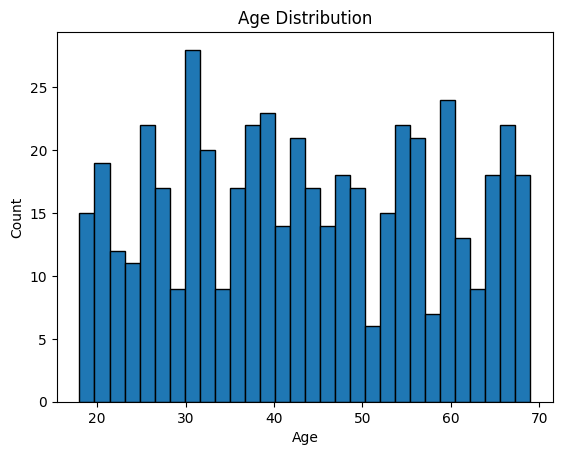

In [8]:
# Histogram for age
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### 2.2 Density Plot for Income

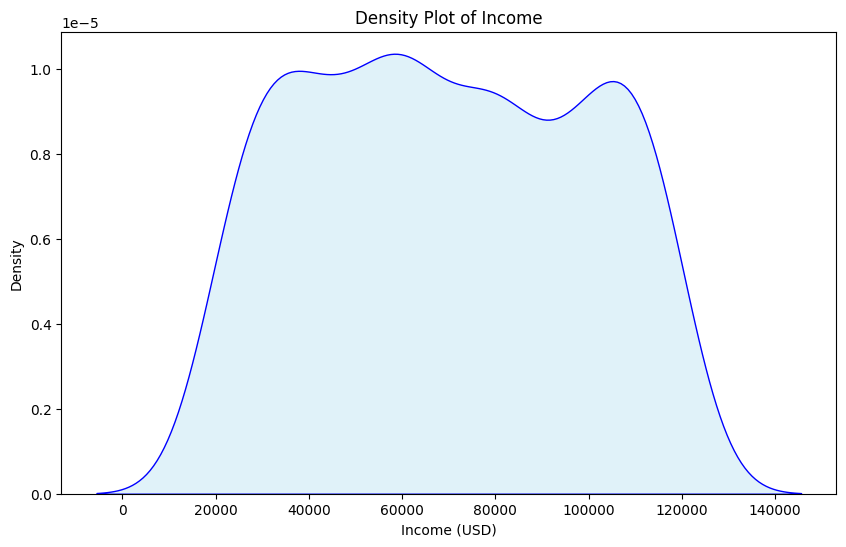

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Income'], fill=True, color='skyblue', edgecolor='blue')

plt.title('Density Plot of Income')
plt.xlabel('Income (USD)')
plt.ylabel('Density')
plt.show()

#### 2.3 Bar Charts for Education_Level and Employment_Status

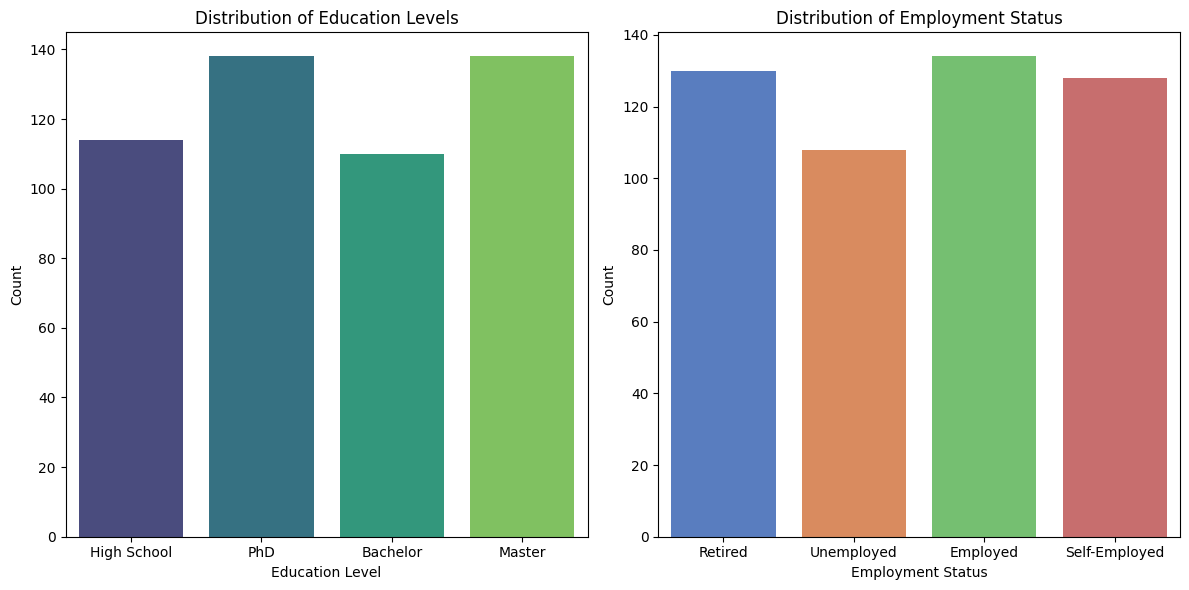

In [10]:
plt.figure(figsize=(12, 6))

# Bar Chart for Education_Level
plt.subplot(1, 2, 1)
sns.countplot(x='Education_Level', data=df, palette='viridis')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Bar Chart for Employment_Status
plt.subplot(1, 2, 2)
sns.countplot(x='Employment_Status', data=df, palette='muted')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 3. Bivariative Analysis

#### 3.1 Grouped Bar Chart for 'Healthy_Eating_Score' and 'Life_Satisfaction' 

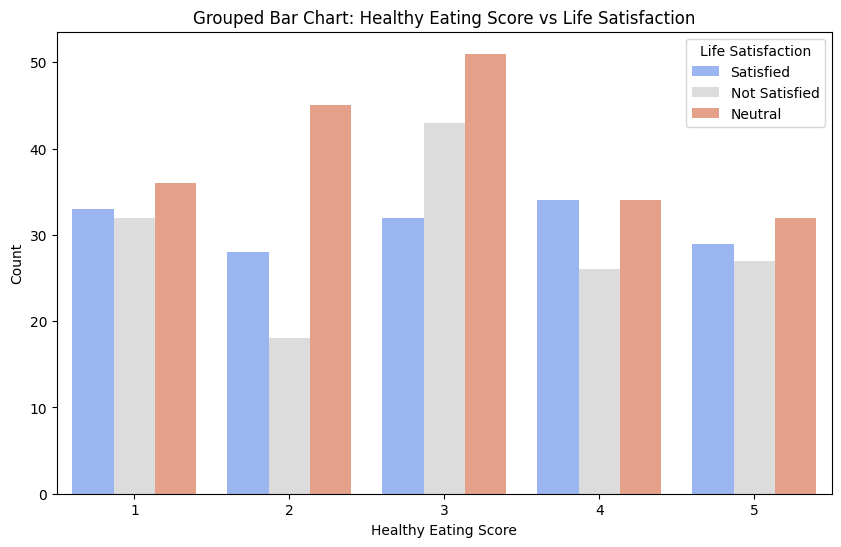

In [11]:
plt.figure(figsize=(10, 6))

# Grouped Bar Chart for Healthy_Eating_Score and Life_Satisfaction
sns.countplot(x='Healthy_Eating_Score', hue='Life_Satisfaction', data=df, palette='coolwarm')
plt.title('Grouped Bar Chart: Healthy Eating Score vs Life Satisfaction')
plt.xlabel('Healthy Eating Score')
plt.ylabel('Count')
plt.legend(title='Life Satisfaction')

plt.show()

#### 3.2 Pair Plot for Numeric Features

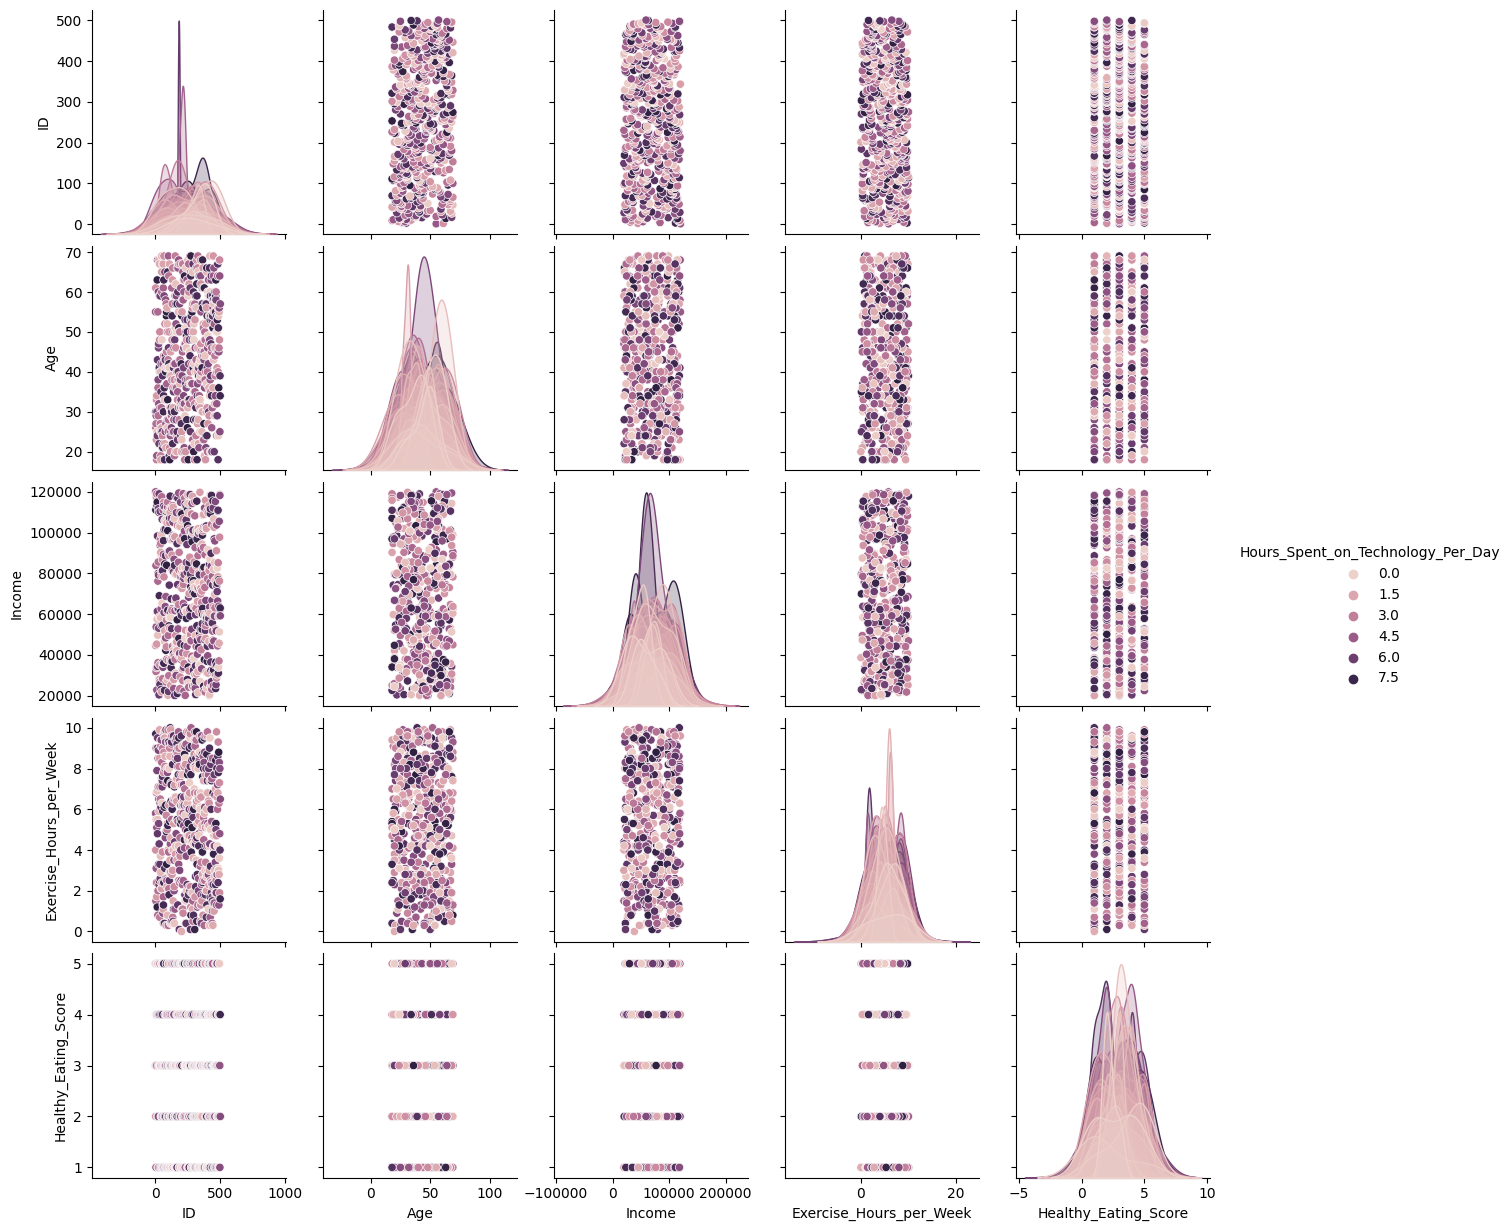

In [12]:
sns.pairplot(df, hue='Hours_Spent_on_Technology_Per_Day')
plt.show()

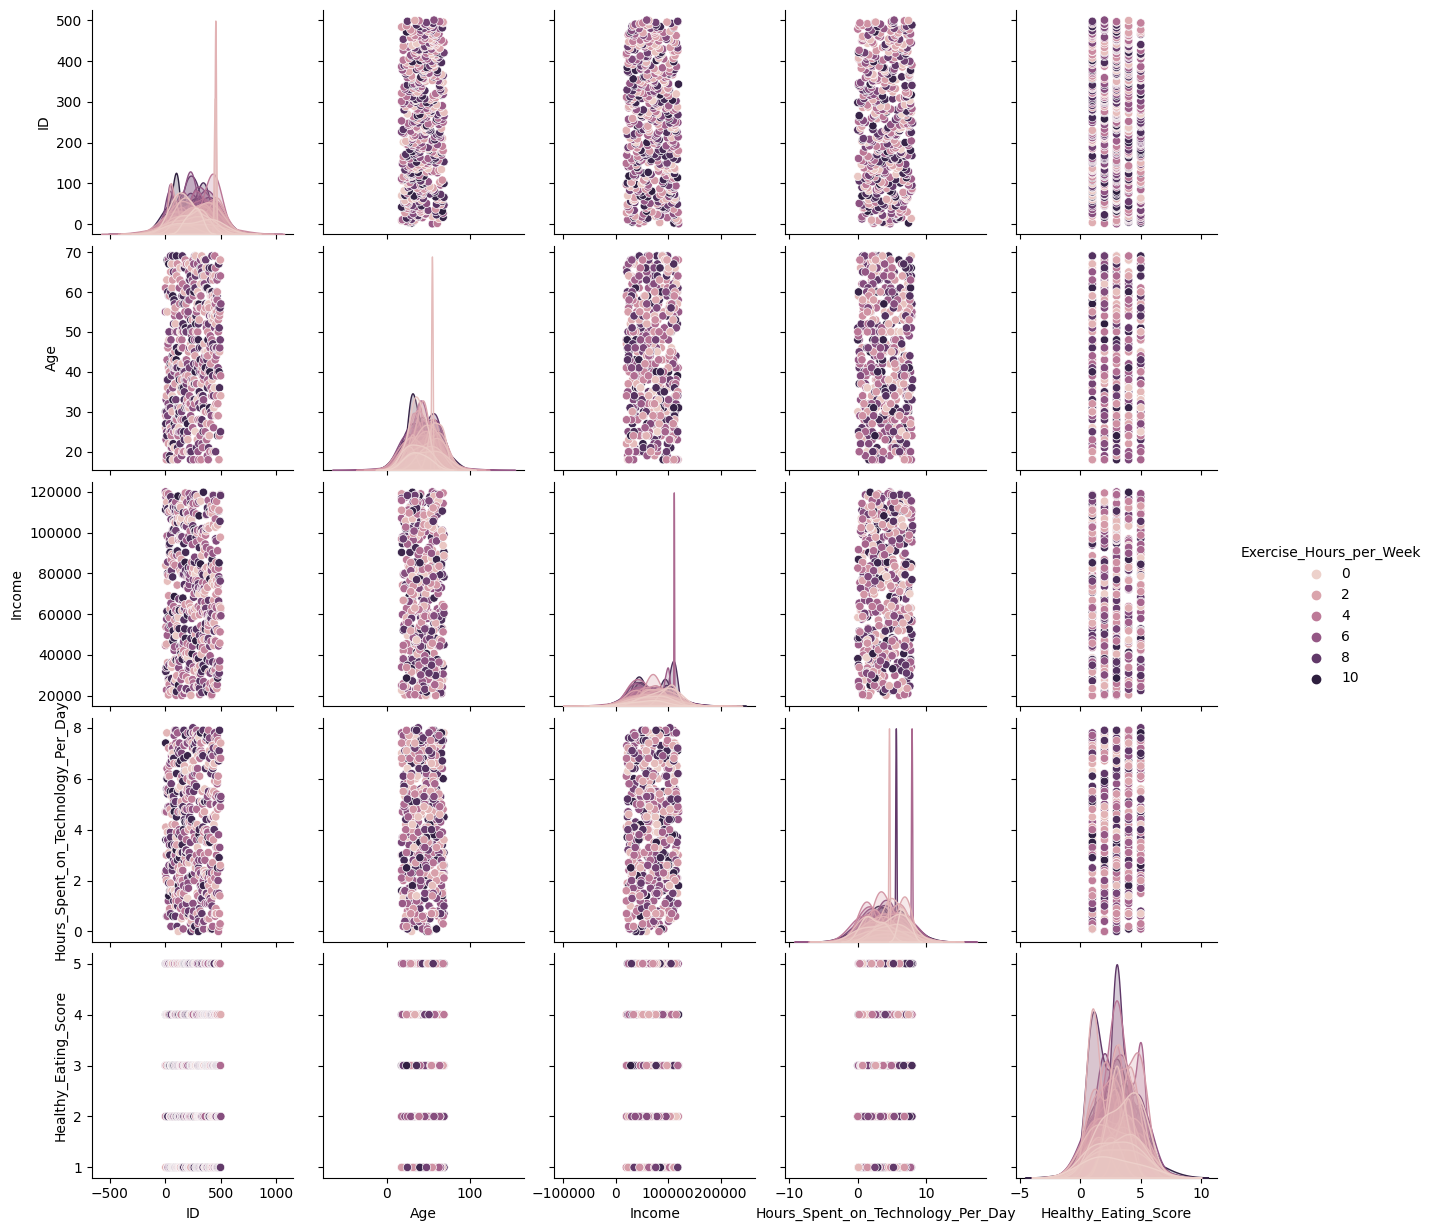

In [13]:
sns.pairplot(df, hue='Exercise_Hours_per_Week')
plt.show()

### 4. Multivariate Analysis

#### 4.1 Heatmap for Hours_Spent_on_Technology_Per_Day' and 'Exercise_Hours_per_Week'

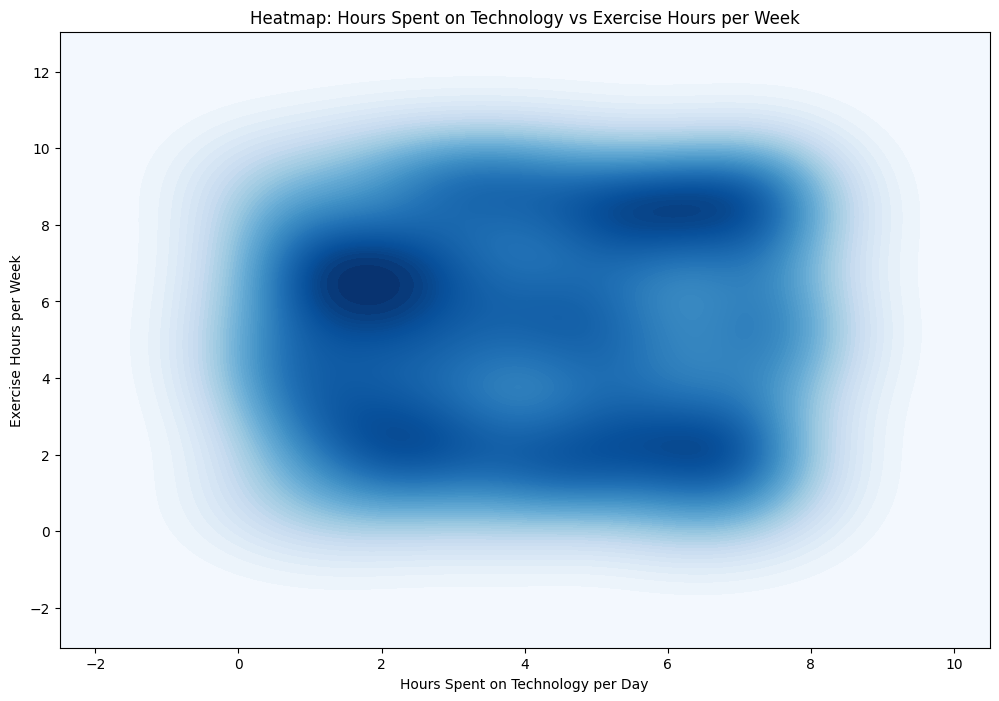

In [14]:
plt.figure(figsize=(12, 8))

# Heatmap for Hours_Spent_on_Technology_Per_Day and Exercise_Hours_per_Week
sns.kdeplot(x=df['Hours_Spent_on_Technology_Per_Day'], y=df['Exercise_Hours_per_Week'], cmap='Blues', fill=True, thresh=0, levels=100)

plt.title('Heatmap: Hours Spent on Technology vs Exercise Hours per Week')
plt.xlabel('Hours Spent on Technology per Day')
plt.ylabel('Exercise Hours per Week')

plt.show()

#### 4.2 Heatmap for 'Age' and 'Income'

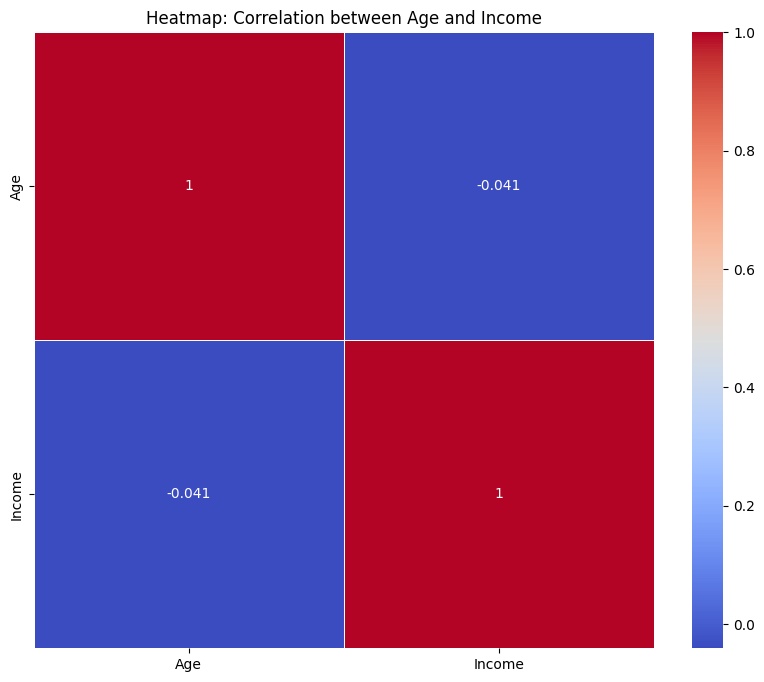

In [15]:
plt.figure(figsize=(10, 8))

# Heatmap for Age and Income
heatmap_data = df[['Age', 'Income']]
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Heatmap: Correlation between Age and Income')
plt.show()

## Correlation

### 1. Data Preparation

In [16]:
# Define a function to map the existing categories to new ones for Education_Level
def recategorize_education(education_level):
    if education_level in ['High School']:
        return 'High School Graduate'
    elif education_level in ['Bachelor']:
        return 'Bachelor\'s Degree'
    elif education_level in ['Master']:
        return 'Master\'s Degree'
    elif education_level in ['PhD']:
        return 'PhD'

# Apply the function to the 'Education_Level' column
df['education_category'] = df['Education_Level'].apply(recategorize_education)

# Check the new value counts
print(df['education_category'].value_counts())

PhD                     138
Master's Degree         138
High School Graduate    114
Bachelor's Degree       110
Name: education_category, dtype: int64


In [17]:
data = df.copy()

### 2. Encoding

In [18]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the education level variable
df = perform_one_hot_encoding(df, 'Education_Level')

# Check the updated dataframe
print(df.head())


   ID  Age  Income Employment_Status  Hours_Spent_on_Technology_Per_Day  \
0   1   55  119997           Retired                                4.7   
1   2   61   44571        Unemployed                                2.3   
2   3   30  111130          Employed                                7.4   
3   4   26   83848          Employed                                4.1   
4   5   27   31806           Retired                                3.6   

   Exercise_Hours_per_Week  Healthy_Eating_Score Life_Satisfaction  \
0                      5.8                     3         Satisfied   
1                      4.0                     2         Satisfied   
2                      9.7                     5     Not Satisfied   
3                      1.5                     1         Satisfied   
4                      9.0                     4           Neutral   

     education_category  Education_Level_Bachelor  \
0  High School Graduate                         0   
1                   Ph

### 3. Correlation Matrix

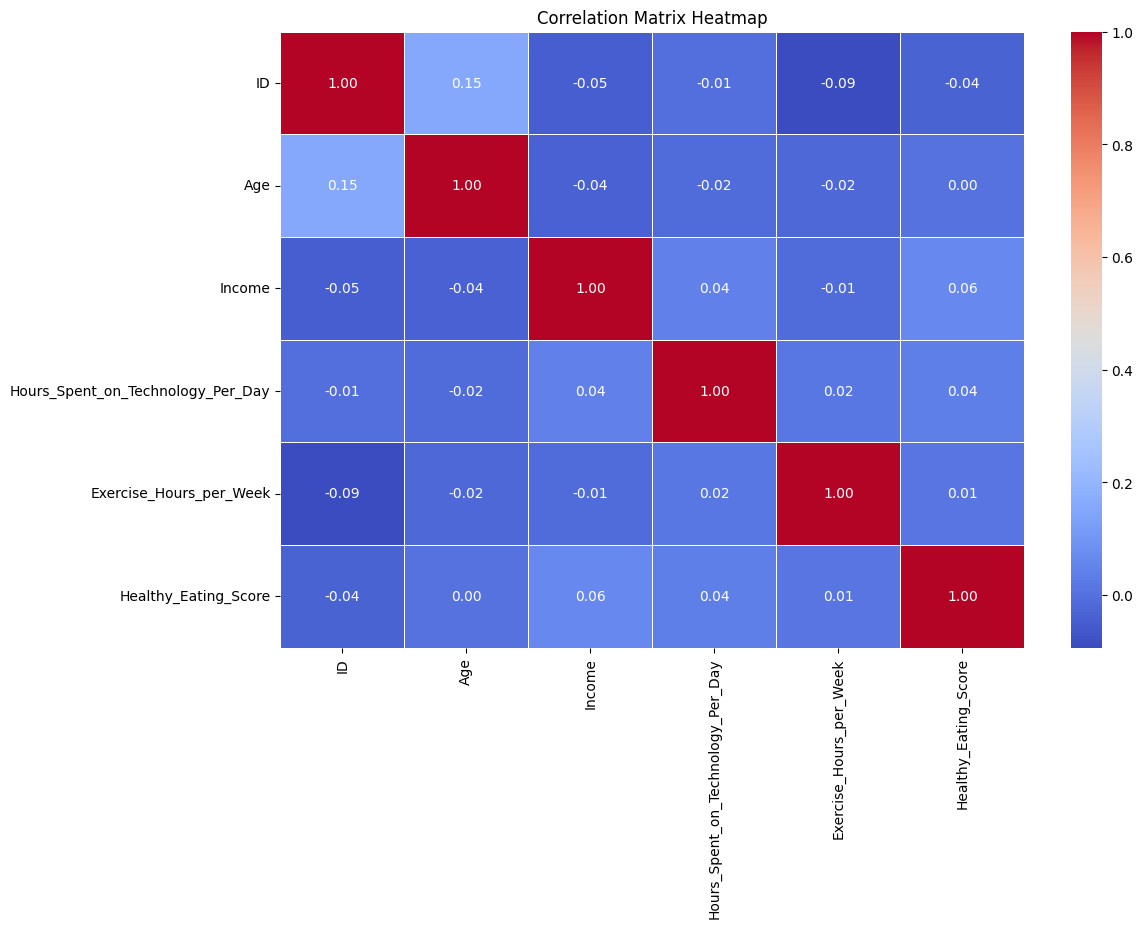

In [19]:
# Select numeric columns for correlation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

## Predictive Analysis

### Preprocessing: StandardScaler

In [20]:
# Define numerical features
numerical_features = ['Age', 'Income', 'Hours_Spent_on_Technology_Per_Day', 'Exercise_Hours_per_Week', 'Healthy_Eating_Score']

# Select numeric columns for correlation (assuming df is your dataframe)
numeric_columns = df[numerical_features]

# Create a StandardScaler for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Apply the preprocessor to your dataframe
X_preprocessed = preprocessor.fit_transform(df)

# Convert the preprocessed data back to a dataframe for visualization
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=numerical_features)

# Check the resulting dataframe
print(X_preprocessed_df.head())

        Age    Income  Hours_Spent_on_Technology_Per_Day  \
0  0.784216  1.713738                           0.266725   
1  1.193087 -0.842421                          -0.757499   
2 -0.919416  1.413238                           1.418978   
3 -1.191997  0.488661                           0.010669   
4 -1.123852 -1.275022                          -0.202711   

   Exercise_Hours_per_Week  Healthy_Eating_Score  
0                 0.211584              0.033550  
1                -0.419382             -0.695797  
2                 1.578675              1.492245  
3                -1.295722             -1.425145  
4                 1.333300              0.762897  


## Confusion Matrix

The trained model is evaluated on the **test set**. **Confusion matrix** is used to visualize the performance of the model. It shows the true positive, true negative, false positive, and false negative predictions of the model.

<br>

![](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

#### **Precision:**

Precision is a measure of how many of the true positive predictions were actually correct. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false positives (FP).

<p class="formulaDsp">
\[ Precision = \frac{TP}{TP + FP} \]
</p>

#### **Recall:**


Recall (or Sensitivity) is a measure of how many of the actual positive cases were identified correctly. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false negatives (FN).

<br>

<p class="formulaDsp">
\[ Recall = \frac{TP}{TP + FN} \]
</p>

#### **F1-Score:**


The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. It is defined as 2 times the product of precision and recall divided by the sum of precision and recall.

<br>

<p class="formulaDsp">
\[ F1 Score = \frac{2 * Precision * Recall}{Precision + Recall} \]
</p>

<br>


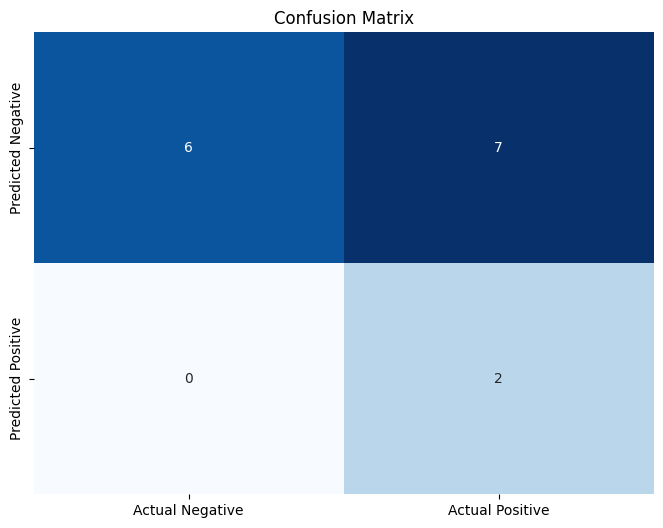

In [21]:

# Define numerical features
numerical_features = ['Age', 'Income', 'Hours_Spent_on_Technology_Per_Day', 'Exercise_Hours_per_Week', 'Healthy_Eating_Score']

# Select numeric columns for correlation (assuming df is your dataframe)
numeric_columns = df[numerical_features]

# Create a StandardScaler for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Split data into features and target variable
X = df.drop('education_category', axis=1)
y = df['education_category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessor to your dataframe
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create and train a model (RandomForestClassifier used as an example)
model = RandomForestClassifier()
model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), and True Positive (TP)
tn, fp, fn, tp = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

# Display the confusion matrix with TN, FP, FN, TP
conf_matrix_display = pd.DataFrame(
    {
        'Actual Negative': [tn, fn],
        'Actual Positive': [fp, tp]
    },
    index=['Predicted Negative', 'Predicted Positive']
)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_display, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.show()


### Interpretation of the Confusion Matrix

The confusion matrix provides a detailed overview of how well our **Random Forest model** performed on the test set. Let's break down the key metrics:

1. **True Positives (TP):** These represent the instances where the model correctly predicted positive classes, such as 'Master's Degree' or 'PhD'. In our case, this is the bottom-right cell.

2. **True Negatives (TN):** These instances show the model's correct prediction of negative classes, like 'High School Graduate' or 'Bachelor's Degree'. This is the top-left cell.

3. **False Positives (FP):** These instances occur when the model predicted positive classes, but the actual class was negative. It includes cases like predicting 'Master's Degree' or 'PhD' when the true label is 'High School Graduate' or 'Bachelor's Degree'. Found in the top-right cell.

4. **False Negatives (FN):** These instances show the model's prediction of negative classes when the actual class is positive. It includes cases like predicting 'High School Graduate' or 'Bachelor's Degree' when the true label is 'Master's Degree' or 'PhD'. Found in the bottom-left cell.

The confusion matrix helps us understand the model's strengths and weaknesses. A high number of True Positives and True Negatives contribute to a better model performance. False Positives and False Negatives, though inevitable, should be minimized. In our context, understanding where the model tends to make mistakes is crucial for refining and improving its predictions. Adjusting the model or its features based on this interpretation can lead to a more accurate and reliable classifier.

## SUMMARY

### Conclusion

In this analysis, we navigated through the process of building and evaluating a **Random Forest model** for predicting education categories based on various features. Here are the key takeaways:

1. **Hyperparameter Tuning:** Through an exhaustive search using GridSearchCV, we determined the optimal hyperparameters for our Random Forest model. These hyperparameters include a `max_depth` of 10, `min_samples_leaf` of 2, `min_samples_split` of 2, and `n_estimators` of 50.

2. **Interpreting Hyperparameters:** The selected hyperparameters suggest a model with moderate complexity, striking a balance between capturing essential patterns in the data and avoiding overfitting to noise or outliers.

3. **Confusion Matrix Analysis:** The confusion matrix provided a detailed breakdown of the model's performance on the test set. Understanding True Positives, True Negatives, False Positives, and False Negatives allows us to grasp where the model excels and where it may need improvement.

4. **Model Evaluation:** The model's overall accuracy, precision, recall, and F1-score contribute to a comprehensive assessment of its effectiveness. These metrics guide us in understanding the model's ability to correctly classify instances and minimize false predictions.

**Insights for Improvement:** The interpretation of the confusion matrix provides valuable insights into potential areas for model enhancement. By focusing on reducing False Positives and False Negatives, we can refine the model further, ensuring more accurate predictions.

**Next Steps:** Moving forward, the iterative process of model refinement, feature engineering, and additional data exploration will contribute to a continuously improving predictive model. Regular evaluations and adaptations based on real-world feedback will ensure the model's robustness and applicability.

**In Summary:** This analysis not only provides a snapshot of the model's current performance but also sets the foundation for ongoing enhancements. The combination of hyperparameter tuning, confusion matrix analysis, and a focus on continuous improvement positions us well for building a reliable and impactful education category prediction model.